In [25]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [26]:
df = pd.read_csv('candidatos.csv')

In [27]:
df.shape

(19158, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [29]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [30]:
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [31]:
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


### ============================================================================================================

In [32]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [33]:
df = df.rename(columns={
    'enrollee_id': 'id', 
    'city': 'cod_cidade', 
    'city_development_index': 'indice_desenv_cidade', 
    'gender': 'sexo',
    'relevent_experience': 'experiencia_relevante?', 
    'enrolled_university': 'curso_universitario_matriculado', 
    'education_level': 'nivel_educacional',
    'major_discipline': 'disciplina_principal', 
    'experience': 'experiencia', 
    'company_size': 'tamanho_empresa', 
    'company_type': 'tipo_empresa',
    'last_new_job': 'diferenca_anos_ultimo_novo_emprego', 
    'training_hours': 'horas_treinamento', 
    'target': 'pretende_trocar_de_emprego?'
})

df

,id,cod_cidade,indice_desenv_cidade,sexo,experiencia_relevante?,curso_universitario_matriculado,nivel_educacional,disciplina_principal,experiencia,tamanho_empresa,tipo_empresa,diferenca_anos_ultimo_novo_emprego,horas_treinamento,pretende_trocar_de_emprego?
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [34]:
df['experiencia_relevante?'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [35]:
df['experiencia_relevante?'] = df['experiencia_relevante?'].map({'Has relevent experience': 'Tem experiência relevante', 'No relevent experience': 'Não tem experiência relevante'})

df

,id,cod_cidade,indice_desenv_cidade,sexo,experiencia_relevante?,curso_universitario_matriculado,nivel_educacional,disciplina_principal,experiencia,tamanho_empresa,tipo_empresa,diferenca_anos_ultimo_novo_emprego,horas_treinamento,pretende_trocar_de_emprego?
0,8949,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,Não tem experiência relevante,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,Não tem experiência relevante,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,Não tem experiência relevante,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Tem experiência relevante,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,Não tem experiência relevante,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Tem experiência relevante,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [36]:
df.isnull().sum()

id                                       0
cod_cidade                               0
indice_desenv_cidade                     0
sexo                                  4508
experiencia_relevante?                   0
curso_universitario_matriculado        386
nivel_educacional                      460
disciplina_principal                  2813
experiencia                             65
tamanho_empresa                       5938
tipo_empresa                          6140
diferenca_anos_ultimo_novo_emprego     423
horas_treinamento                        0
pretende_trocar_de_emprego?              0
dtype: int64

In [37]:
moda_tipo_curso = df.curso_universitario_matriculado.mode()[0]

df['curso_universitario_matriculado'] = df['curso_universitario_matriculado'].fillna(moda_tipo_curso)

df

,id,cod_cidade,indice_desenv_cidade,sexo,experiencia_relevante?,curso_universitario_matriculado,nivel_educacional,disciplina_principal,experiencia,tamanho_empresa,tipo_empresa,diferenca_anos_ultimo_novo_emprego,horas_treinamento,pretende_trocar_de_emprego?
0,8949,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,Não tem experiência relevante,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,Não tem experiência relevante,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,Não tem experiência relevante,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Tem experiência relevante,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,Não tem experiência relevante,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Tem experiência relevante,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [38]:
list(df.columns.values)[3:12]

['sexo',
 'experiencia_relevante?',
 'curso_universitario_matriculado',
 'nivel_educacional',
 'disciplina_principal',
 'experiencia',
 'tamanho_empresa',
 'tipo_empresa',
 'diferenca_anos_ultimo_novo_emprego']

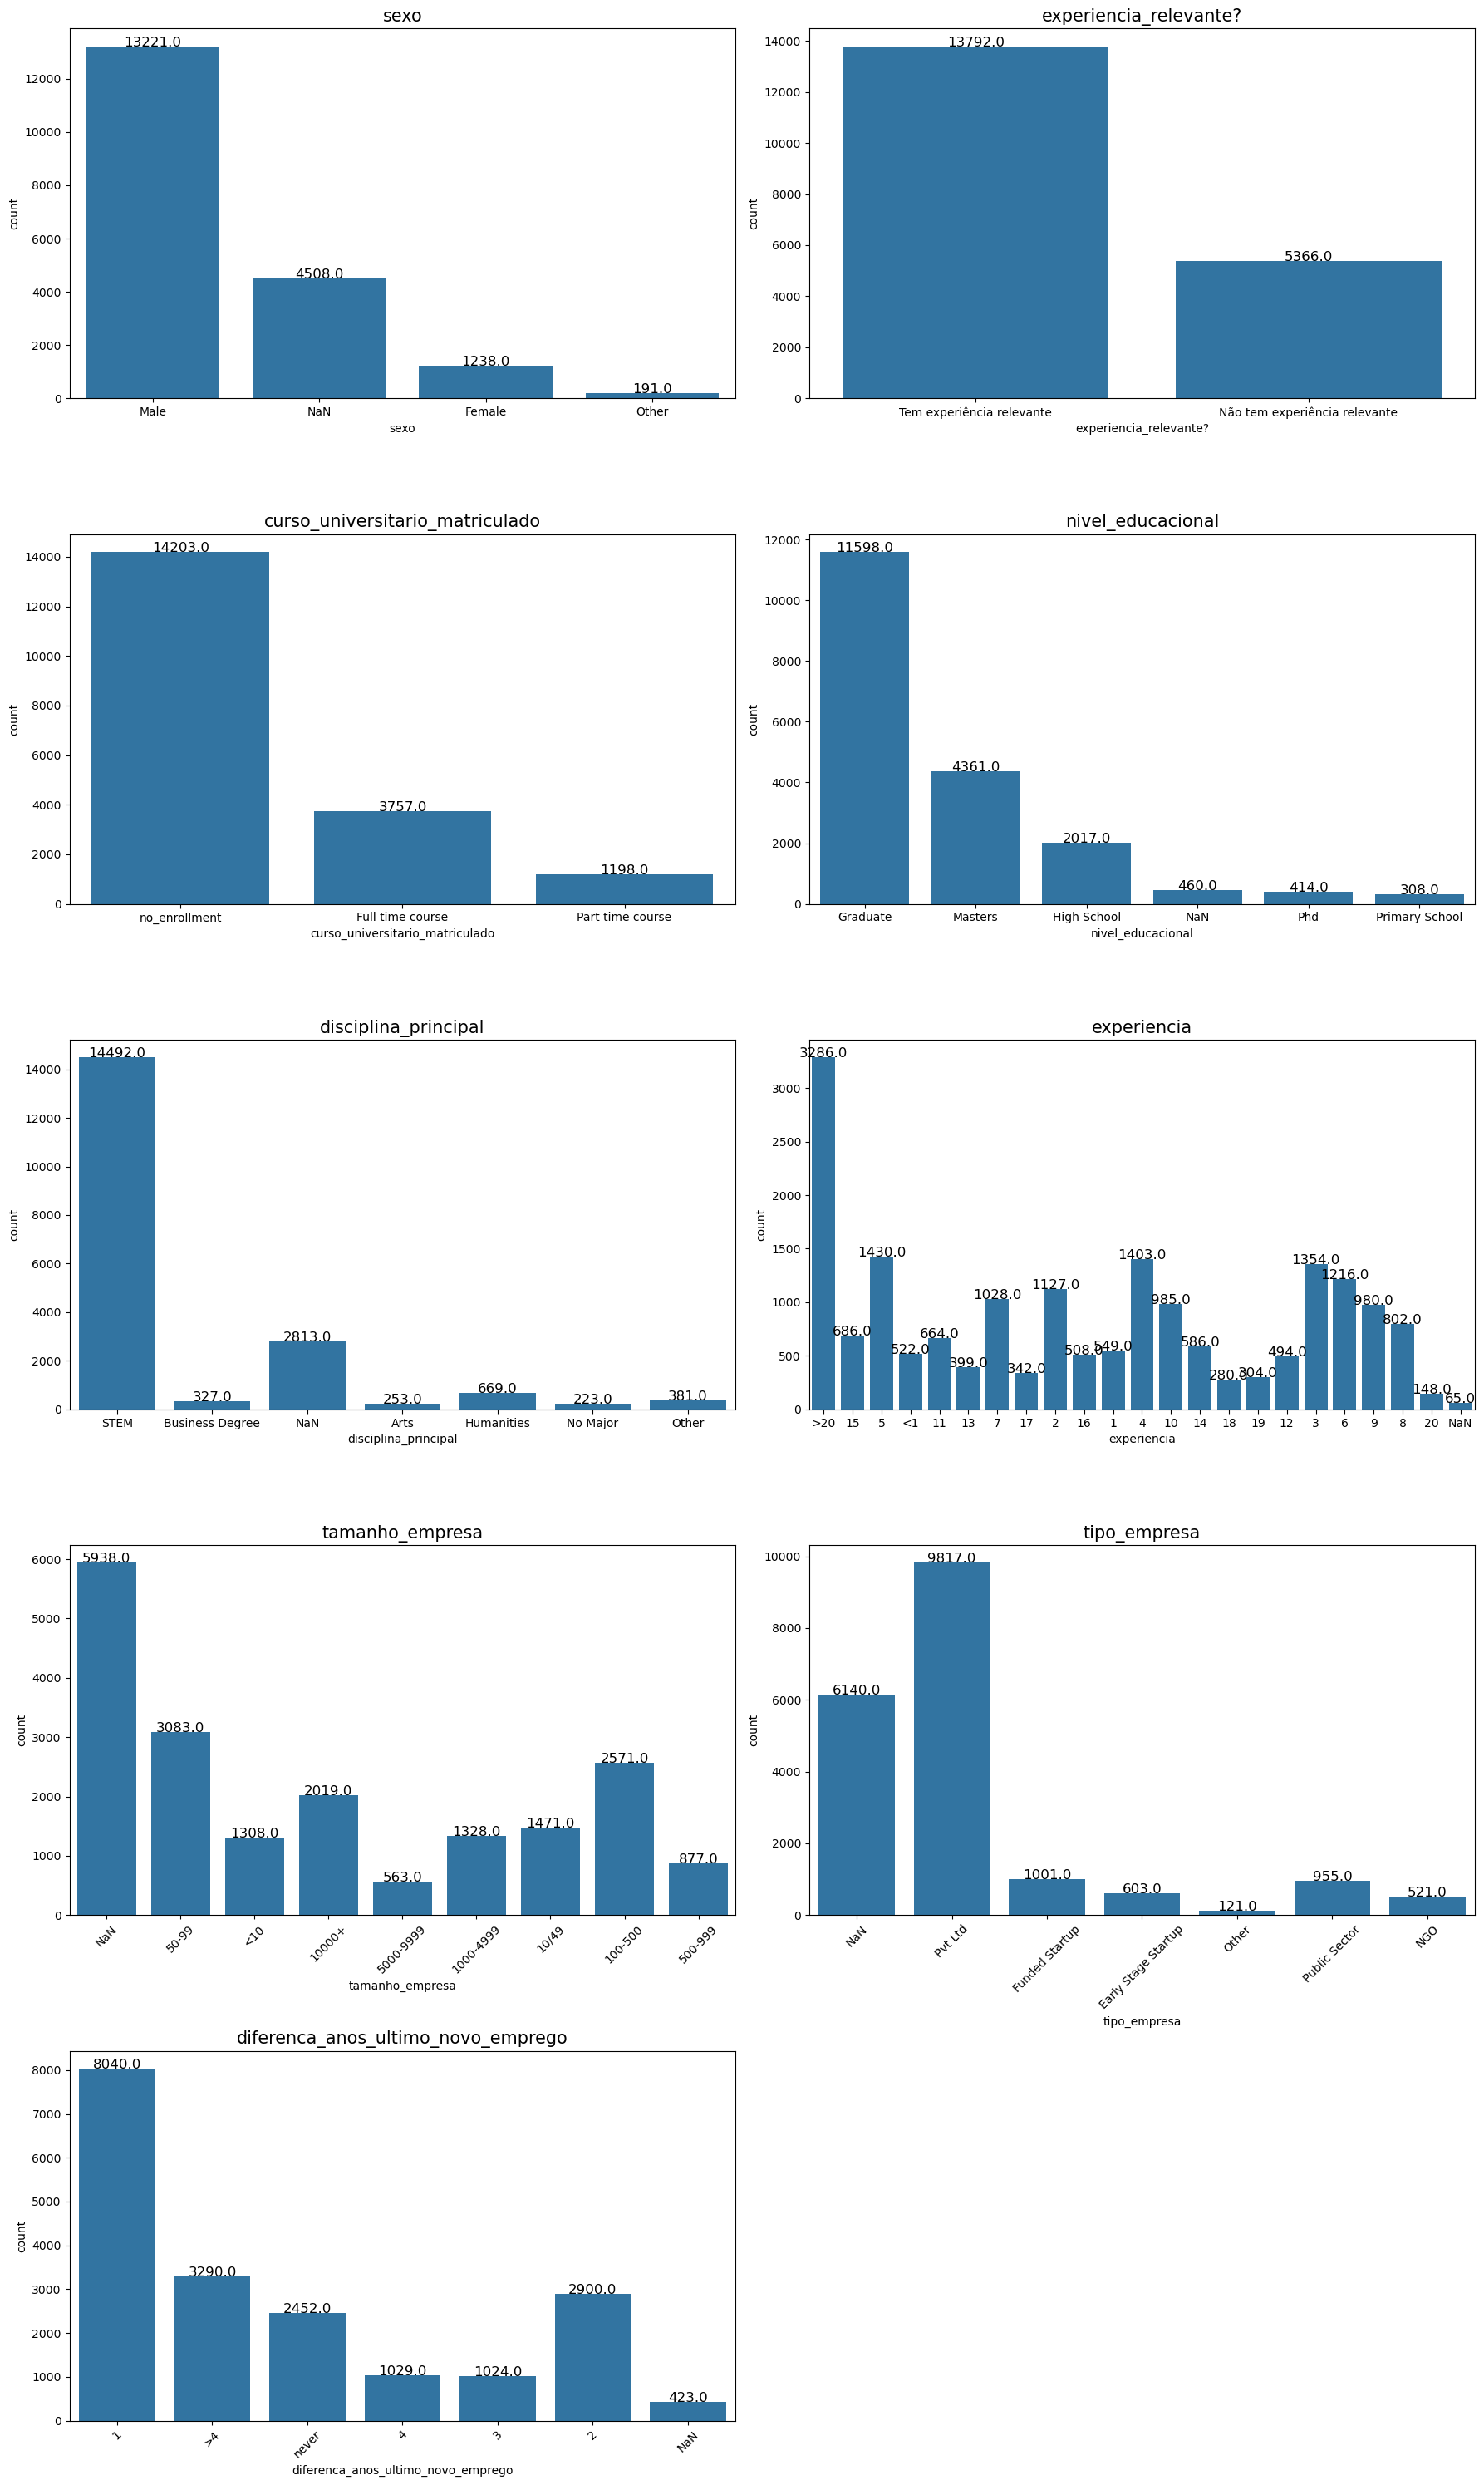

In [39]:
# Plot - Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), 
                    ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

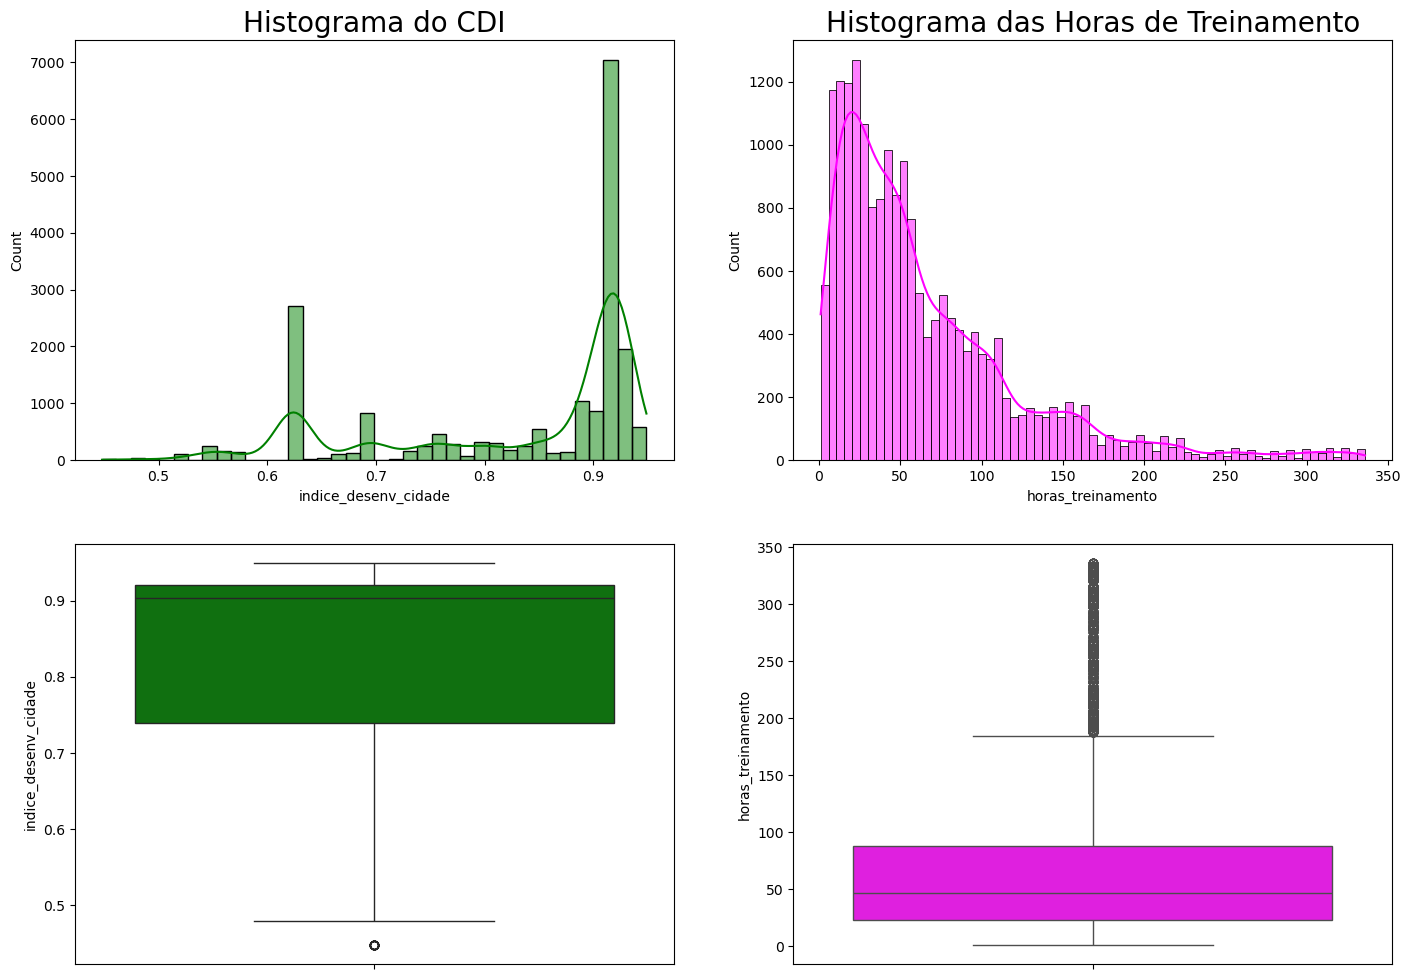

In [40]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['indice_desenv_cidade'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['horas_treinamento'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['indice_desenv_cidade'], color = "green")

plt.subplot(224)
sns.boxplot(df['horas_treinamento'], color = "magenta")

plt.show()

In [41]:
df['experiencia'].value_counts()

experiencia
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [42]:
# Convertemos a variável experiencia para numérica
df["experiencia"] = np.where(df["experiencia"] == "<1", 1, df["experiencia"])
df["experiencia"] = np.where(df["experiencia"] == ">20", 21, df["experiencia"])
df["experiencia"] = df["experiencia"].astype(float)

In [43]:
df['experiencia'].value_counts()

experiencia
21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: count, dtype: int64

In [44]:
df['diferenca_anos_ultimo_novo_emprego'].value_counts()

diferenca_anos_ultimo_novo_emprego
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [45]:
# Convertemos a variável diferenca_anos_ultimo_novo_emprego para numérica
df["diferenca_anos_ultimo_novo_emprego"] = np.where(df["diferenca_anos_ultimo_novo_emprego"] == "never", 0, df["diferenca_anos_ultimo_novo_emprego"])
df["diferenca_anos_ultimo_novo_emprego"] = np.where(df["diferenca_anos_ultimo_novo_emprego"] == ">4", 5, df["diferenca_anos_ultimo_novo_emprego"])
df["diferenca_anos_ultimo_novo_emprego"] = df["diferenca_anos_ultimo_novo_emprego"].astype(float)

In [46]:
df['diferenca_anos_ultimo_novo_emprego'].value_counts()

diferenca_anos_ultimo_novo_emprego
1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: count, dtype: int64

In [47]:
df.head()

,id,cod_cidade,indice_desenv_cidade,sexo,experiencia_relevante?,curso_universitario_matriculado,nivel_educacional,disciplina_principal,experiencia,tamanho_empresa,tipo_empresa,diferenca_anos_ultimo_novo_emprego,horas_treinamento,pretende_trocar_de_emprego?
0,8949,city_103,0.920,Male,Tem experiência relevante,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,Não tem experiência relevante,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,Não tem experiência relevante,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,Não tem experiência relevante,no_enrollment,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Tem experiência relevante,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  19158 non-null  int64  
 1   cod_cidade                          19158 non-null  object 
 2   indice_desenv_cidade                19158 non-null  float64
 3   sexo                                14650 non-null  object 
 4   experiencia_relevante?              19158 non-null  object 
 5   curso_universitario_matriculado     19158 non-null  object 
 6   nivel_educacional                   18698 non-null  object 
 7   disciplina_principal                16345 non-null  object 
 8   experiencia                         19093 non-null  float64
 9   tamanho_empresa                     13220 non-null  object 
 10  tipo_empresa                        13018 non-null  object 
 11  diferenca_anos_ultimo_novo_emprego  18735

In [51]:
df.drop(["id","cod_cidade","sexo","experiencia_relevante?","curso_universitario_matriculado","nivel_educacional",
                   "disciplina_principal","tamanho_empresa","tipo_empresa"], axis = 1).corr()

,indice_desenv_cidade,experiencia,diferenca_anos_ultimo_novo_emprego,horas_treinamento,pretende_trocar_de_emprego?
indice_desenv_cidade,1.000000,0.332981,0.188984,0.001920,-0.341665
experiencia,0.332981,1.000000,0.479376,0.000644,-0.175820
diferenca_anos_ultimo_novo_emprego,0.188984,0.479376,1.000000,-0.006276,-0.082607
horas_treinamento,0.001920,0.000644,-0.006276,1.000000,-0.021577
pretende_trocar_de_emprego?,-0.341665,-0.175820,-0.082607,-0.021577,1.000000


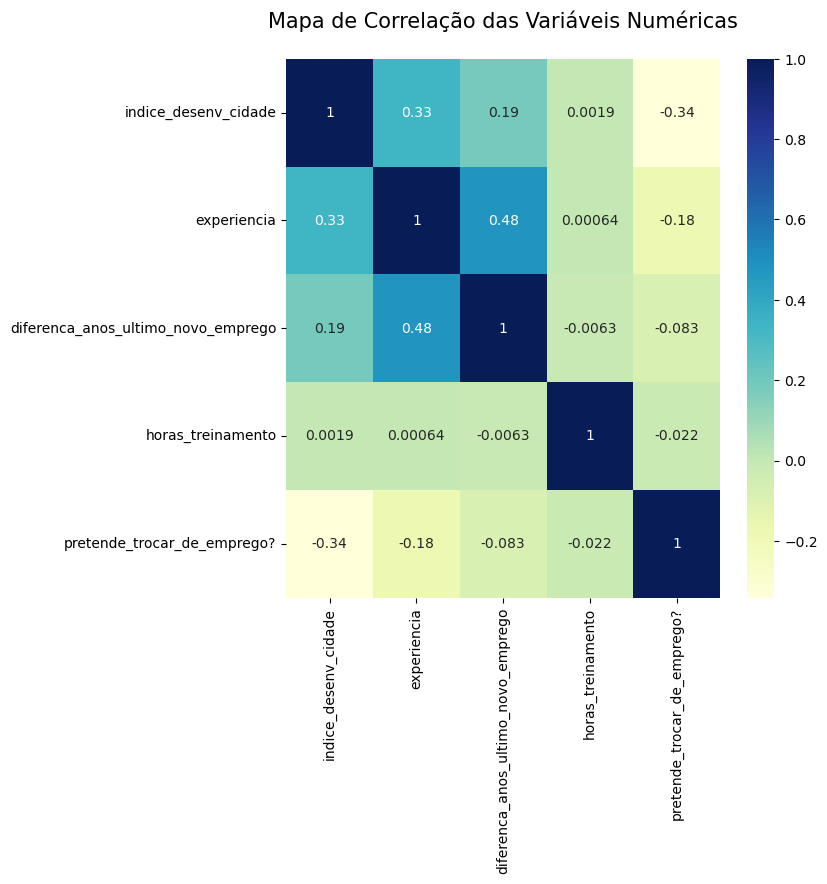

In [52]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df.drop(["id","cod_cidade","sexo","experiencia_relevante?","curso_universitario_matriculado","nivel_educacional",
                   "disciplina_principal","tamanho_empresa","tipo_empresa"], axis = 1).corr(), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()